In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# Lec 9 Bagging and Random Forest
## Bagging = Boostrapping

### 정리

- boosting : tree들 combine 시 예측성 높은 tree에 가중치 둠 -> overfitting 가능성
- bagging = boostraping : equal weight (generalize 되는 장점) -> tree 들 끼리 uncorrelated / train set 전체 x 변수 다 이용해서 tree bagging -> 원데이터와 유사한 데이터가 만들어질 가능성이 크다.
- random forest : train set의 일부분을 무작위로 bagging 함 -> m=sqrt(p) 개 가지고 tree 만듦. -> overfitting 가능성 줄음 -> uncorrelated 된 나무 만들기 위함 / 대규모 데이터에서 적절하다. 

- RandomForestClassifier : y가 범주형일 때
- RandomForestRegressor : y가 연속형일 때

- max_features=None -> bagging
- max_features='auto', max_samples=0.66 -> random forest

- mean_squared_error : y가 연속형
- confusion_matrix : y가 범주형

In [2]:
data1=np.array([3,4,5,6,7,8,9])
data1

array([3, 4, 5, 6, 7, 8, 9])

In [3]:
# with replacement 중복 허용해서 랜덤으로 추출

np.random.seed(0)
np.random.choice(data1,size=10,replace=True)

array([7, 8, 3, 6, 6, 6, 4, 6, 8, 5])

In [4]:
np.random.choice(data1,size=10,replace=True)

array([7, 9, 3, 3, 7, 5, 4, 9, 9, 3])

In [6]:
data2="c:/temp/iris.csv"
iris=pd.read_csv(data2)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
np.random.seed(0)
iris_100=iris.iloc[np.random.randint(150,size=100)]
# 150개 중에 100개 랜덤으로 뽑은 것
iris_100

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
47,4.6,3.2,1.4,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
67,5.8,2.7,4.1,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
43,5.0,3.5,1.6,0.6,setosa
127,6.1,3.0,4.9,1.8,virginica


In [9]:
# Bagging + train test split

X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [10]:
150*0.7

105.0

In [11]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [14]:
# Bagging 해보자
bag1=RandomForestClassifier(n_estimators=10,max_features=None,random_state=0,max_depth=2)
bag1
# n_estimators : 만들 나무 개수

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [15]:
result1=bag1.fit(X_train,y_train)
result1

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [17]:
pred1=result1.predict(X_test)
pred1

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [18]:
# bagging 예측 성과
confusion_matrix(y_test,pred1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3,  8]], dtype=int64)

In [19]:
# CCR
(16+17+8)/(16+17+8+1+3)

0.9111111111111111

In [20]:
# Bagging, 나무를 100개 만들어보자
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag2=RandomForestClassifier(n_estimators=100,max_features=None,random_state=0,max_depth=2)
result2=bag2.fit(X_train,y_train)
pred2=result2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [21]:
y_test

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
137     virginica
84     versicolor
27         setosa
127     virginica
132     virginica
59     versicolor
18         setosa
83     versicolor
61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
43         setosa
10         setosa
Name: Species, dtype: object

In [22]:
pd.value_counts('y_test')

y_test    6
dtype: int64

In [23]:
pd.value_counts('X_test')

X_test    6
dtype: int64

In [24]:
# CCR, n_estimators=100
(16+17+10)/(16+17+8+1+3)

0.9555555555555556

In [26]:
# 나무 500개
bag3=RandomForestClassifier(n_estimators=500, max_features=None, random_state=0, max_depth=2)
result3=bag3.fit(X_train,y_train)
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [27]:
# CCR, n_estimators=500
(16+17+11)/(16+17+11+1)

0.9777777777777777

## Random Forest

boostrapping 과 비슷하지만
- equal weight

차이점
- x 변수 전체를 사용하지 않고 몇 개만 이용함

In [28]:
rf4=RandomForestClassifier(n_estimators=10,max_features='auto',max_samples=0.66,random_state=0,max_depth=2)
result4=rf4.fit(X_train,y_train)
pred4=result4.predict(X_test)
confusion_matrix(y_test,pred4)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [29]:
# CCR, Random forest, n_estimators=10
(16+17+10)/(1+1+16+17+10)

0.9555555555555556

## y가 범주형 = Regressor 일 때, Bagging 과 Random Forest
### 이때 예측 성과는 mean_squared_error(,)

In [30]:
file3="c:/temp/Boston.csv"
data3=pd.read_csv(file3)
data3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
# Bagging, Regressor
X=data3.drop('medv',axis=1)
y=data3['medv']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

bag5=RandomForestRegressor(n_estimators=100,max_features=None,random_state=0,max_depth=3)
result5=bag5.fit(X_train,y_train)
pred5=result5.predict(X_test)
mean_squared_error(y_test,pred5)

17.857767501639618

In [33]:
# Randomforest, Regressor
rf6=RandomForestRegressor(n_estimators=100,max_features='auto',max_samples=0.66,random_state=0,max_depth=3)
result6=rf6.fit(X_train,y_train)
pred6=result6.predict(X_test)
mean_squared_error(y_test,pred6)

19.639974504576372

In [37]:
# mse는 작을 수록 좋음
# Bagging의 mse가 random forest의 mse가 더 작다. bagging이 더 좋은 것

#### random forest에서 사용하는 변수 개수
아래 결과를 보면 4개 사용한다

In [35]:
np.sqrt(13)

3.605551275463989

### random forest에서 중요하게 사용된 x 변수 파악하기

- random forest에서 변수 중요성 측정 방법 : VIP variance importance index

In [39]:
# 각 x 변수의 vip 값: 클 수록 중요한 변수(그 변수가 추가되었을 때 얼마나 개선되느냐)
imp=result6.feature_importances_
imp

array([2.13681757e-02, 4.65869412e-04, 2.89659108e-03, 8.14505090e-04,
       1.32182661e-02, 4.93489561e-01, 4.21119016e-03, 3.02357322e-02,
       2.12648443e-03, 4.74239267e-03, 9.71116968e-03, 3.51993027e-03,
       4.13200132e-01])

In [40]:
# 저 숫자 계산 하는 법... 강의 봐라

- bar graph 로 vip를 그려서 어떤 변수가 중요한지 그래프로 한 눈에 보자

In [41]:
imp1=pd.DataFrame({'importance':imp},index=X.columns)
imp1

,importance
crim,0.021368
zn,0.000466
indus,0.002897
chas,0.000815
nox,0.013218
rm,0.493490
age,0.004211
dis,0.030236
rad,0.002126
tax,0.004742


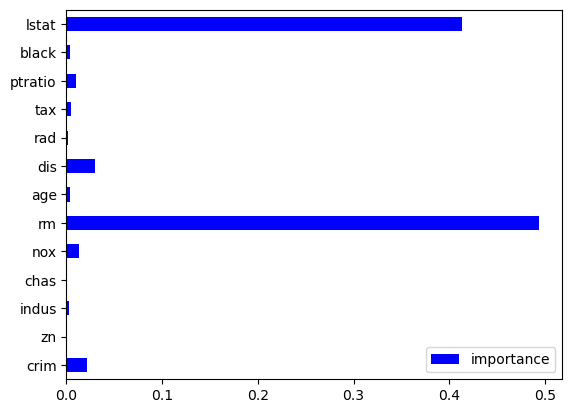

In [42]:
imp1.plot(kind='barh',color='blue')
plt.show()

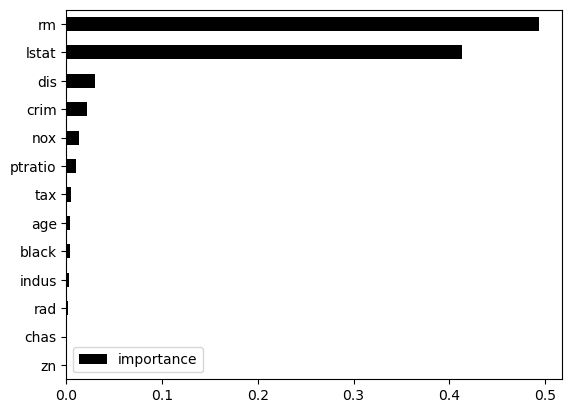

In [45]:
imp1.sort_values('importance',ascending=True,inplace=True)
imp1.plot(kind='barh',color='black')
plt.show()

In [46]:
imp1

,importance
zn,0.000466
chas,0.000815
rad,0.002126
indus,0.002897
black,0.003520
age,0.004211
tax,0.004742
ptratio,0.009711
nox,0.013218
crim,0.021368
